In [1]:
# We going to see first a sample of datas 
input_file = "/home/vic/PFM/marketing_pax.csv"
output_file = "/home/vic/PFM/marketing_pax_mini.csv"
! ls $input_file

/home/vic/PFM/marketing_pax.csv


In [2]:
! head -100000 $input_file > $output_file

In [3]:
import pandas as pd

In [4]:
! head -5 $output_file

rloc^full_name^gender^age^date_of_birth^document_type^document_number^document_country^nationality^fqtv_data^general_status^boarding_status^acceptance_status^bag_status^customer_accepted^checkin_location^boarded_in_all_legs_flag^cabin_code^booking_class_code^airline_code^flight_number^departure_date_leg^quality_index^creation_date^advance_purchase^creator_office_id^creator_iata_number^creator_gds_code^creator_city_code^creator_lat^creator_lon^creator_country_code^creator_continent_name^creator_channel_code^booking_status_code^cabin_code_seg^booking_class_code_seg^pos_office_id^pos_iata_number^pos_gds_code^pos_city_code^pos_lat^pos_lon^pos_country_code^pos_continent_code^pos_channel_code^board_point^board_lat^board_lon^board_country_code^board_continent_code^off_point^off_lat^off_lon^off_country_code^off_continent_code^distance_seg^route^network^airline_code_seg^flight_number_seg^flight_type^revenue_amount_seg^emd_count^emd_amount^fuel_surcharge_amount_seg
60Z666^/MUZASDQUE^F^^^^^^^0160

In [9]:
# Código de la reserva, nombre del pasajero, fecha de salida, ciudad origen, país origen, ciudad salida, país salida
cols = ['rloc','full_name','departure_date_leg','board_country_code','board_point','off_country_code','off_point']
df_mini = pd.read_csv(output_file, sep='^', usecols=cols, parse_dates=['departure_date_leg'])

In [10]:
df_mini.head(10)

,rloc,full_name,departure_date_leg,board_point,board_country_code,off_point,off_country_code
0,60Z666,/MUZASDQUE,2013-06-23,MRV,RU,BRU,BE
1,612666,Z/MZFFUFGDGZQ,2014-04-01,BRU,BE,LNZ,AT
2,818666,AZSRGZSIAZS/T,2013-04-16,BRU,BE,DEN,US
3,827666,T/HUYMXMTGOTMUM,2013-02-02,BRU,BE,LIL,FR
4,8PD666,YU/YUDVMMTHQZEMX,2013-10-25,BRU,BE,MMX,SE
5,8R7666,H/USADHMEUXQ,2013-11-05,BOO,NO,BRU,BE
6,93X666,YMDFUZDAFFM/,2013-07-25,BRU,BE,ORK,IE
7,0QB666,VAZMFTMZBQSXQD/,2014-04-01,BRU,BE,KTM,NP
8,0AK666,QUR MZPQDEVAZEEAZ/X,2013-08-09,VKO,RU,BRU,BE
9,0AK666,DUW GXR VATMZEFDMZPQXX/PUP,2013-08-05,BRU,BE,VKO,RU


In [11]:
df_mini.dtypes

rloc                          object
full_name                     object
departure_date_leg    datetime64[ns]
board_point                   object
board_country_code            object
off_point                     object
off_country_code              object
dtype: object

In [12]:
# Better show if there are nulls in this columns
df_mini.isnull().sum()

rloc                  0
full_name             0
departure_date_leg    0
board_point           0
board_country_code    0
off_point             0
off_country_code      0
dtype: int64

In [13]:
# It seems that there are no nulls. 
# We are going to group by rloc and get first time and first board and last off
df_agg = df_mini.groupby(['rloc'])

In [80]:
# We want count ocurrences for every number repetition.
df_agg.count()['full_name'].value_counts()

1     69851
2      9287
3      1504
4       510
5       235
6       174
7       120
8        74
9        50
10       25
11       18
12       15
13        7
15        5
14        4
18        1
16        1
17        1
20        1
Name: full_name, dtype: int64

In [87]:
# We look %
counts_values = df_agg.count()['full_name'].value_counts()/len(df_agg['full_name'])
print counts_values

1     0.853059
2     0.113418
3     0.018368
4     0.006228
5     0.002870
6     0.002125
7     0.001466
8     0.000904
9     0.000611
10    0.000305
11    0.000220
12    0.000183
13    0.000085
15    0.000061
14    0.000049
18    0.000012
16    0.000012
17    0.000012
20    0.000012
Name: full_name, dtype: float64


In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

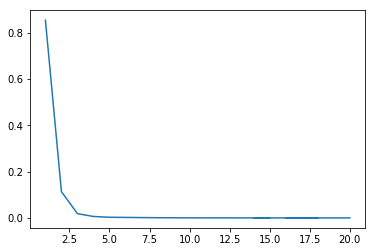

In [95]:
plt.plot(counts_values)

In [23]:
# Top connections in unique rloc
df_agg.count().sort_values('full_name',ascending=False).head()

,full_name,departure_date_leg,board_point,board_country_code,off_point,off_country_code
rloc,,,,,,
TNJ7MC,20,20,20,20,20,20
3EW67H,18,18,18,18,18,18
KHO6IW,17,17,17,17,17,17
BVQ791,16,16,16,16,16,16
A7Y6WE,15,15,15,15,15,15


In [34]:
df_mini.loc[df_mini['rloc'] == 'A7Y6WE']

,rloc,full_name,departure_date_leg,board_point,board_country_code,off_point,off_country_code
38820,A7Y6WE,HMZQEEMSDMMQ/,2013-07-16,LSE,US,BRU,BE
38821,A7Y6WE,ZQ MSZQFTQ EWZGPEQZ/TQXQ,2013-07-16,LSE,US,BRU,BE
38822,A7Y6WE,GX YMDOGEXMDEQZ/BA,2013-07-16,LSE,US,BRU,BE
38823,A7Y6WE,UEFUMZ XQHUZZUQXEQZ/OTD,2013-07-16,LSE,US,BRU,BE
38824,A7Y6WE,T EFQQZNQDSVQZEQZ/QPUF,2013-07-05,ORK,IE,BRU,BE
38825,A7Y6WE,GX YMDOGEXMDEQZ/BA,2013-07-05,ORK,IE,BRU,BE
38826,A7Y6WE,MZZQ MXSDQZYUWWQXEQZ/T,2013-07-05,ORK,IE,BRU,BE
38827,A7Y6WE,PM EGEMZZQ FEMZPTAXY/XUZ,2013-07-05,ORK,IE,BRU,BE
38828,A7Y6WE,QFT TMULYMZZXMEEQZ/QXEQN,2013-07-05,BRU,BE,LSE,US
38829,A7Y6WE,Z/XUENQFTYADFQZEQ,2013-07-05,BRU,BE,LSE,US


In [ ]:
# Seems problematic wihtout hour predict which is the real board and the real destiny.
# Maybe ignore that case is a good solution, since the proportion with 2 or more rows for 1 rloc y very low

In [44]:
# We going to see rloc with one escale, (10% registres after group), for try think one solution
df_mini.head()

,rloc,full_name,departure_date_leg,board_point,board_country_code,off_point,off_country_code
0,60Z666,/MUZASDQUE,2013-06-23,MRV,RU,BRU,BE
1,612666,Z/MZFFUFGDGZQ,2014-04-01,BRU,BE,LNZ,AT
2,818666,AZSRGZSIAZS/T,2013-04-16,BRU,BE,DEN,US
3,827666,T/HUYMXMTGOTMUM,2013-02-02,BRU,BE,LIL,FR
4,8PD666,YU/YUDVMMTHQZEMX,2013-10-25,BRU,BE,MMX,SE


In [84]:
rlocs_2 = df_agg.count().index[df_agg.count()['full_name'] == 2].tolist()
rlocs_2
df_rlocs2 = df_mini[df_mini['rloc'].isin(rlocs_2)]
assert len(df_rlocs2) == 9287 * 2
df_rlocs2.head(20)

,rloc,full_name,departure_date_leg,board_point,board_country_code,off_point,off_country_code
8,0AK666,QUR MZPQDEVAZEEAZ/X,2013-08-09,VKO,RU,BRU,BE
9,0AK666,DUW GXR VATMZEFDMZPQXX/PUP,2013-08-05,BRU,BE,VKO,RU
11,1UG666,ZM DAZSOGU/MZ,2014-01-03,KYA,TR,BRU,BE
12,1UG666,ZM DAZSOGU/MZ,2013-12-21,BRU,BE,VKO,RU
14,386666,X/XGFLEFQZLQ,2013-04-19,BRU,BE,SXB,FR
15,386666,X/XGFLEFQZLQ,2013-04-19,SXB,FR,BRU,BE
21,OMG666,TQDIUSQDMGI/,2013-04-09,BDS,IT,BRU,BE
22,OMG666,TQDIUSQDMGI/,2013-04-19,QXB,FR,BRU,BE
25,OJX666,/YMDUWMTKAWWU,2013-03-26,FDE,NO,BRU,BE
26,OJX666,/VQYUZMTKAWWU,2013-03-22,BRU,BE,FDE,NO


In [ ]:
# Seems that without hour timestamp its imposible know board and off and differenciate transbords
# Also, we can see the dates between rows can be wide. We can ignore that and take every row as one travel

## CLEAN DATA

1. Read chunk 100000 rows.
2. Get columns 'rloc','full_name','departure_date_leg','board_country_code','board_point','off_country_code','off_point'
3. Get data where count with same rloc be equal 1 or 2. Ignore the rest rows
4. Join data in new dataframe
5. Export dataframe as new csv
6. Revise notebook and document possible methods